In [16]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
import seaborn as sns
!pip install livewires
import pandas as pd
from datetime import datetime
!pip install tensorflow
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=a6079bd081016cfedd6c5a66faced44547eca025c0d81183410a90c69f8aede4
  Stored in directory: c:\users\tjame\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=977cdbbdab9f8fa78f2cde02d553f7eca2e924c2aeea870863f8efcd7fd8f283
  Stored in directory: c:\users\tjame\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\tjame\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'tensorflow'

In [55]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

###We'll start by working with Guanyuan,Beijing data, and filter the dataset down to records from 2015.

In [18]:
df_Beijing = pd.read_csv('C:/Users/tjame/Downloads/PRSA2017_Data_20130301-20170228/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv')
df_Beijing = df_Beijing[df_Beijing.year >= 2015]
df_Beijing.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16104,16105,2015,1,1,0,5.0,6.0,13.0,15.0,300.0,44.0,-1.0,1027.0,-22.4,0.0,NNW,4.4,Guanyuan
16105,16106,2015,1,1,1,7.0,8.0,12.0,13.0,300.0,46.0,-1.0,1027.0,-23.7,0.0,N,5.6,Guanyuan
16106,16107,2015,1,1,2,3.0,6.0,11.0,10.0,200.0,48.0,-1.0,1028.0,-23.7,0.0,N,4.2,Guanyuan
16107,16108,2015,1,1,3,4.0,8.0,11.0,12.0,300.0,47.0,-1.0,1029.0,-24.4,0.0,N,4.4,Guanyuan
16108,16109,2015,1,1,4,3.0,5.0,12.0,12.0,300.0,48.0,-2.0,1027.0,-23.2,0.0,ENE,1.4,Guanyuan
16109,16110,2015,1,1,5,5.0,12.0,11.0,25.0,400.0,34.0,-5.0,1030.0,-23.5,0.0,N,1.1,Guanyuan
16110,16111,2015,1,1,6,4.0,9.0,9.0,34.0,400.0,25.0,-6.0,1029.0,-23.8,0.0,NE,1.6,Guanyuan
16111,16112,2015,1,1,7,6.0,9.0,9.0,41.0,400.0,19.0,-7.0,1030.0,-24.2,0.0,NE,2.0,Guanyuan
16112,16113,2015,1,1,8,9.0,9.0,13.0,48.0,500.0,13.0,-6.0,1028.0,-23.8,0.0,E,0.9,Guanyuan
16113,16114,2015,1,1,9,9.0,9.0,13.0,48.0,NaN,13.0,-5.0,1026.0,-23.5,0.0,ENE,1.7,Guanyuan


In [19]:
###We are interested in attempting to forecast the 'PM' series, which are measurements of air pollution for several different districts. Note that there are occasional missing values in these series, which we can fill with simple linear interpolation. To start, we'll focus on the "PM10" series and interpolate the missing values.

Text(0, 0.5, 'Temperature')

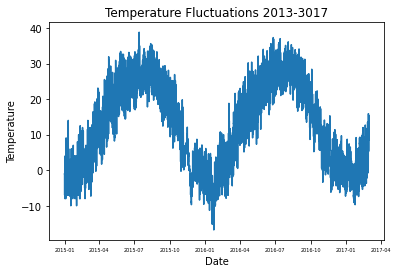

In [78]:
plt.plot(df_Beijing['TEMP'])
# Add title and axis names
plt.title('Temperature Fluctuations 2013-3017')
plt.xlabel('Date')
plt.rc('xtick', labelsize=16)
plt.ylabel('Temperature')

In [21]:
df_Beijing['PM10'] = df_Beijing['PM10'].interpolate()
df_Beijing['TEMP'] = df_Beijing['TEMP'].interpolate()
df_Beijing['PM10'].head(10)

16104     6.0
16105     8.0
16106     6.0
16107     8.0
16108     5.0
16109    12.0
16110     9.0
16111     9.0
16112     9.0
16113     9.0
Name: PM10, dtype: float64

In [23]:
def make_data(row):
    return datetime(year = row['year'], month = row['month'], day = row['day'], hour = row['hour'])
df_Beijing['date'] = df_Beijing.apply(make_data,axis=1)
df_Beijing.set_index(df_Beijing.date,inplace=True)

Text(0.5, 0, 'Date')

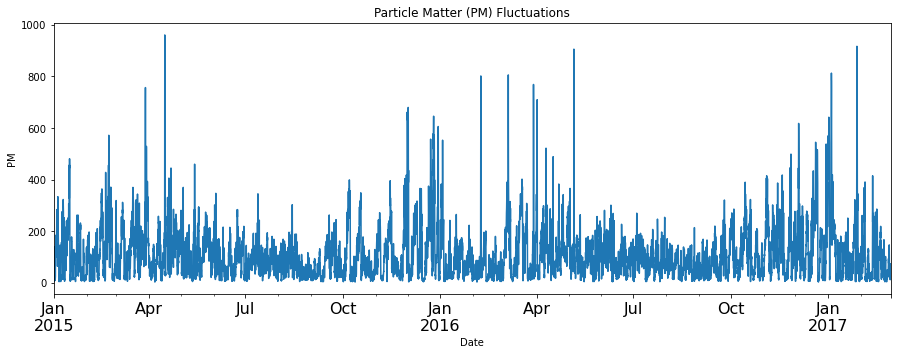

In [81]:
#quick plot of full time series
plt.figure(figsize = (15,5))
df_Beijing['PM10'].plot()
plt.title('Particle Matter (PM) Fluctuations')
plt.ylabel('PM')
plt.xlabel('Date')

In [25]:
df_Beijing['PM10']

date
2015-01-01 00:00:00     6.0
2015-01-01 01:00:00     8.0
2015-01-01 02:00:00     6.0
2015-01-01 03:00:00     8.0
2015-01-01 04:00:00     5.0
                       ... 
2017-02-28 19:00:00    37.0
2017-02-28 20:00:00    43.0
2017-02-28 21:00:00    33.0
2017-02-28 22:00:00    24.0
2017-02-28 23:00:00    27.0
Name: PM10, Length: 18960, dtype: float64

###As usual, it's a good idea for us to generate a run-sequence plot before modeling the data. This way we can get a feel for what we're working with. We'll go ahead and define two utility functions that let us extract and plot the last $n$ days of data (remember that this is an hourly time series, so each day has 24 time steps).

In [26]:
def get_n_last_days(df, series_name, n_days):
    """
    Extract last n_days of an hourly time series
    """
    
    return df[series_name][-(24*n_days):] 

def plot_n_last_days(df, series_name, n_days):
    """
    Plot last n_days of an hourly time series 
    """
    plt.figure(figsize = (10,5))   
    plt.plot(get_n_last_days(df, series_name, n_days), 'k-')
    plt.title('{0} Air Quality Time Series - {1} days'
              .format(series_name, n_days))
    plt.xlabel('Recorded Hour')
    plt.ylabel('Reading')
    plt.grid(alpha=0.3)

###What do the last 6 weeks of data look like?

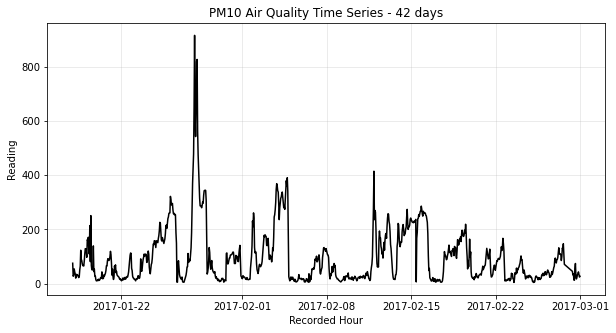

In [27]:
plot_n_last_days(df_Beijing, 'PM10', 42)

###
Before we can train a neural network with keras, we need to process the data into a format that the library accepts. In particular, for keras RNNs and LSTMs, training samples should be stored in a 3D numpy array of shape (n_samples, time_steps, n_features). Since we'll be using only the series' history to predict its future, we'll only have 1 feature. Also, for the next-step prediction that we'll do in this notebook, target values can be stored in a simple list.

To this end, we define utility functions that allow us to extract the formatted data. The get_train_test_data function gives us the flexibility to define the length of the extracted training and test sequences and the number of time steps to use for prediction -- we'll run simple tests of our models by holding out the end of the extracted sequence and generating predictions to compare against the ground truth.

Since our model will perform better with multiple training samples, we draw many slices from the entire training sequence, starting at different points in time. The gap between starting points of these slices is controlled by the sample_gap parameter.

In [28]:
df_Beijing.shape

(18960, 19)

In [29]:
def get_keras_format_series(series):
    """
    Convert a series to a numpy array of shape 
    [n_samples, time_steps, features]
    """
    
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)

def get_train_test_data(df, series_name, series_days, input_hours, 
                        test_hours, sample_gap=3):
    """
    Utility processing function that splits an hourly time series into 
    train and test with keras-friendly format, according to user-specified
    choice of shape.    
    
    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_hours (int): length of sequence input to network 
    test_hours (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 5
    
    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y     
    """
    
    forecast_series = get_n_last_days(df, series_name, series_days).values # reducing our forecast series to last n days

    train = forecast_series[:-test_hours] # training data is remaining days until amount of test_hours
    test = forecast_series[-test_hours:] # test data is the remaining test_hours

    train_X, train_y = [], []

    # range 0 through # of train samples - input_hours by sample_gap. 
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_hours, sample_gap): 
        train_X.append(train[i:i+input_hours]) # each training sample is of length input hours
        train_y.append(train[i+input_hours]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras
    
    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_hours] 
    test_y = test[input_hours:] # test_y is remaining values from test set
    
    return train_X, test_X_init, train_y, test_y


###With the get_train_test_data utility function in hand, we're all set to extract keras-friendly arrays and start training simple RNN models. We run this function in the cell below. We use the last 56 days of the PM10 series, and will train a model that takes in 12 time steps in order to predict the next time step. We use the last day of data for visually testing the model.

In [30]:
series_days = 56
input_hours = 12
test_hours = 24

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df_Beijing, 'PM10', series_days, 
                         input_hours, test_hours))

In [31]:
train_y.shape

(436,)

###Below we see that by taking multiple time slices, we get 436 training samples of 12 time steps each.

In [32]:
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

Training input shape: (436, 12, 1)
Training output shape: (436,)
Test input shape: (12,)
Test output shape: (12,)


###And now we're ready to train! Since we'd like to repeatedly adjust our model's hyperparameters to see what works best, we'll write a reusable function for training a simple RNN model using keras. 

In [38]:
!pip install keras
!pip install tensorflow
import tensorflow
import keras
from keras.models import Sequential
def fit_SimpleRNN(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached protobuf-3.15.7-py2.py3-none-any.whl (173 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_auth-1.28.0-py2.py3-none-any.whl (136 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-4.2.1-py3-none-any.whl (12 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using 

###Now let's use this function to fit a very simple baseline model.

In [42]:
from keras.layers import Activation, SimpleRNN, Dense
model = fit_SimpleRNN(train_X, train_y, cell_units=10, epochs=10)

###Not bad so far. But we need to work a bit harder to actually extract multi-step predictions from this model, as it was trained to predict only one future time step. For multi-step forecasting, we'll iteratively generate one prediction, append it to the end of the input sequence (and shift that sequence forward by one step), then feed the new sequence back to the model. We stop once we've generated all the time step predictions we need.

In [43]:
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series      
    """
    
    X_init = X_init.copy().reshape(1,-1,1)
    preds = []
    
    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction
    
    preds = np.array(preds).reshape(-1,1)
    
    return preds

def predict_and_plot(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_hours)  #predict range is going to be from end of X_init to length of test_hours
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')
    
    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])

###We can simply run the predict_and_plot function on the extracted test data as below, and inspect the resulting plot.

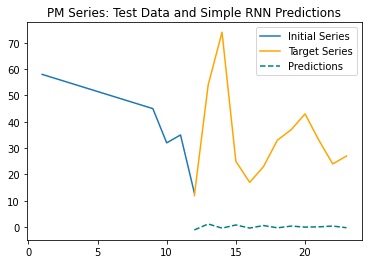

In [44]:
predict_and_plot(test_X_init, test_y, model,
                 'PM Series: Test Data and Simple RNN Predictions')

###
It looks like our model is badly underfit and essentially just making constant predictions. That's ok, it was a very simple baseline and trained very quickly.

We can improve by making the model more expressive, increasing cell_units. We can also pass over the training data many more times, increasing epochs, giving the model more opportunity to learn the patterns in the data. We'll try that below, it takes a longer time now since our training is more extensive.

Note that there is a significant amount of randomness in neural network training - we may need to retrain the model a few times in order to get results that we're happy with.

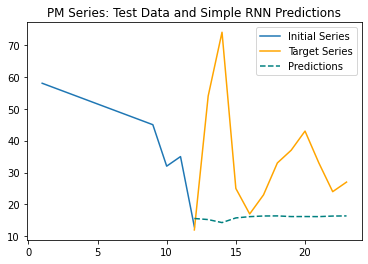

In [49]:
model = fit_SimpleRNN(train_X, train_y, cell_units=30, epochs=1200)
predict_and_plot(test_X_init, test_y, model,
                 'PM Series: Test Data and Simple RNN Predictions')

###
We can definitely get better results than before. Note that the model has the capacity to forecast an upward trend based on the trough pattern that occured recently (the input sequence).

Once we've created a model object, we can also get information about its structure and number of parameters by using the summary function. This is a useful way to measure the complexity of the model and get a feel for how long it may take to train.

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 30)                960       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


###
Note that even for this relatively simple model, we already have almost a thousand parameters to train. A larger number of cell units would increase the number of parameters - this is why the training process can become so time consuming.

###
In this section, we'll build on our previous work by introducing LSTM models as an enhancement to the RNNs we've trained so far. Our first step will be to write a new function for fitting an LSTM with keras - notice that it's almost the same as our simple RNN function, with LSTM substitued for SimpleRNN.

In [50]:
def fit_LSTM(train_X, train_y, cell_units, epochs):
    """
    Fit LSTM to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells  
    epochs (int): number of training epochs   
    """
    
    # initialize model
    model = Sequential() 
    
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1))) #,return_sequences= True))
    #model.add(LSTM(cell_units_l2, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

###With our new LSTM training function and all of our previously defined utility functions, adapting our code for LSTM forecasting will be fairly simple. We can extract the data as we did before, call the fit_LSTM function to build a model, and run the same predict_and_plot code.

Remember that one of the key benefits of LSTMs over simple RNNs is that they are better equipped to handle long input sequences and long-term dependencies. To see this evidence of this, we'll set input_hours to 12 and test_hours to 96 and see how our model predictions turn out with LSTM.

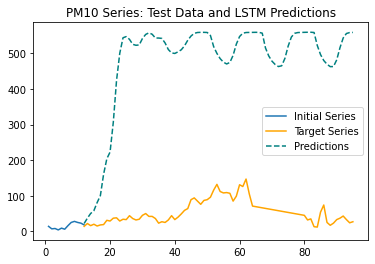

In [53]:
from tensorflow.keras.layers import LSTM
series_days = 50 
input_hours = 12
test_hours = 96

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df_Beijing, 'PM10', series_days, 
                         input_hours, test_hours))

model = fit_LSTM(train_X, train_y, cell_units=70, epochs=3000) 

predict_and_plot(test_X_init, test_y, model, 
                 'PM10 Series: Test Data and LSTM Predictions')

###
In our prediction plot we can start to see how LSTMs can be more expressive than simple RNNs - instead of just extrapolating a simple trend like our previous RNN models did, this LSTM model can effectively anticipate inflection points.

Notice also that our model starts to struggle toward the end of the predicted sequence, becoming more conservative in its predictions. To improve the quality of forecasts over many time steps, we'd likely need to use more data and more sophisticated LSTM model structures

In [54]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 70)                20160     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 71        
Total params: 20,231
Trainable params: 20,231
Non-trainable params: 0
_________________________________________________________________
